In [6]:
import numpy
import scipy.stats
import matplotlib.pyplot
from joblib import dump, load
from test_case import test_prdict_proba
%matplotlib inline

In [7]:
# specify the dataset settings (a mixutre of gaussian)
pi = numpy.array([0.5, 0.5])
ita_0 = numpy.array([0.5, 0.5])
ita_1 = numpy.array([0.5, 0.5])
mu_0_0 = numpy.array([4.0])
mu_0_1 = numpy.array([-64.0])
mu_1_0 = numpy.array([-4.0])
mu_1_1 = numpy.array([72.0])
cov_0_0 = numpy.array([960.0])
cov_0_1 = numpy.array([1280.0])
cov_1_0 = numpy.array([980.0])
cov_1_1 = numpy.array([1024.0])

In [9]:
test_case = 1
N = 10000
N_grid = 128
edge = 160.0
v_edge = 160.0
x_mesh = numpy.linspace(-edge, edge, N_grid).reshape(-1, 1)

p_x_y = numpy.vstack([pi[0] * ita_0[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_0, cov=cov_0_0) + 
                      pi[1] * ita_0[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_1, cov=cov_0_1), 
                      pi[1] * ita_1[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_0, cov=cov_1_0) +
                      pi[1] * ita_1[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_1, cov=cov_1_1)])
p_x = numpy.sum(p_x_y, axis=0)
p_true = p_x_y / p_x

In [10]:
x = numpy.load('./data/x3' + '_' + str(N) + '.npy')
y = numpy.load('./data/y3' + '_' + str(N) + '.npy')

In [15]:
cal_list = ['EMP10', 'EMP32', 'ISO_L', 'ISO_S', 'PLATT', 'BETA']

/home/sh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/sh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


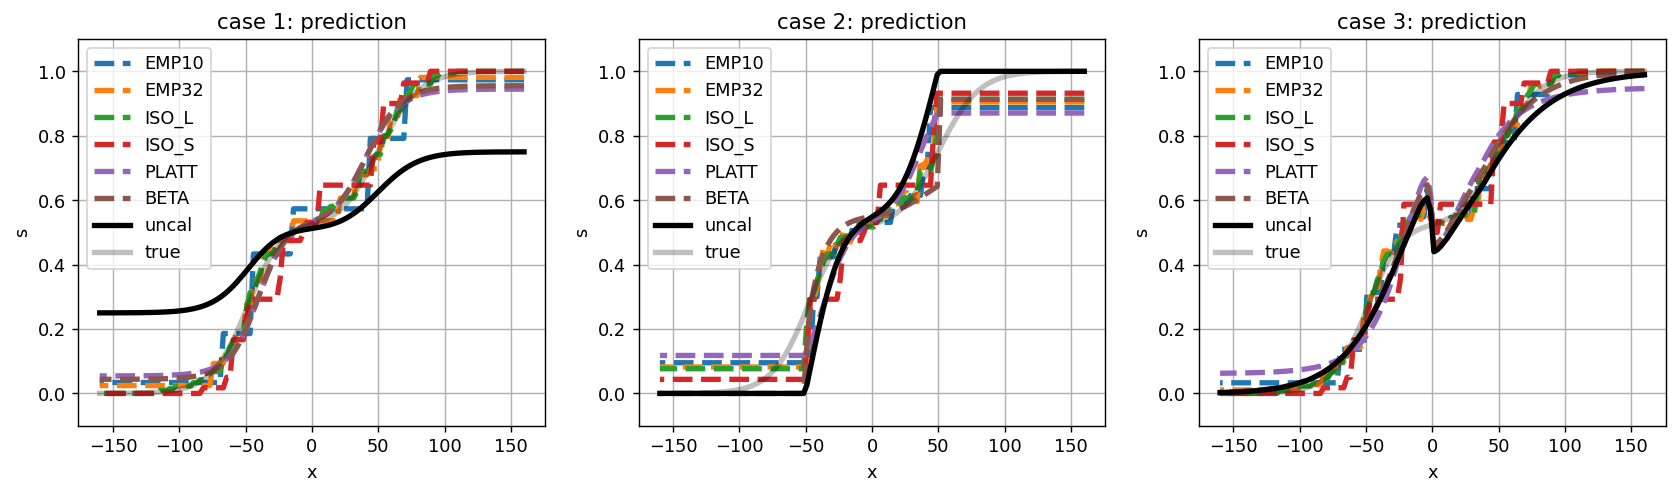

In [32]:
fig, ax_list = matplotlib.pyplot.subplots(ncols=3, nrows=1, dpi=128, figsize=(16, 4))
for i in range(0, len(cal_list)):
    cal_ref = cal_list[i]
    for j in range(0, 3):
        s_cal_mesh = numpy.load('./data/case' + str(j+1) + '_' + cal_ref + '_s_mesh_hat.npy')
        ax_list[j].plot(-x_mesh, s_cal_mesh[:, 0], linestyle='--', linewidth=3.0)

for j in range(0, 3):
    s_mesh = test_prdict_proba(j+1, x_mesh)
    ax_list[j].plot(-x_mesh, s_mesh[:, 0], 'k', linewidth=3.0)
    ax_list[j].plot(-x_mesh, p_true[0], 'k', linewidth=3.0, alpha=0.25)
    ax_list[j].set_xlabel('x')
    ax_list[j].set_ylabel('s')
    ax_list[j].set_title('case ' + str(j + 1) + ': prediction')
    ax_list[j].set_ylim([-0.1, 1.1])
    ax_list[j].grid()
    ax_list[j].legend(cal_list + ['uncal', 'true'])

matplotlib.pyplot.savefig('./figures/all_prediction')


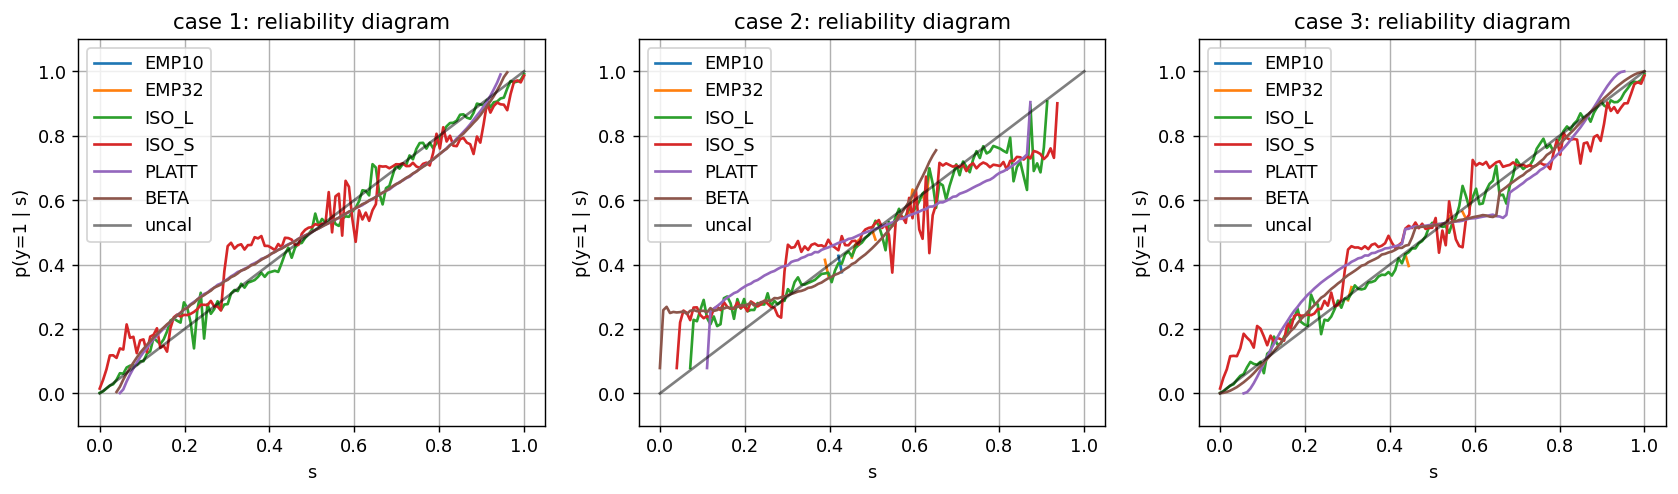

In [33]:
fig, ax_list = matplotlib.pyplot.subplots(ncols=3, nrows=1, dpi=128, figsize=(16, 4))
for i in range(0, len(cal_list)):
    cal_ref = cal_list[i]
    for j in range(0, 3):
        p_y_hat_hat = numpy.load('./data/case' + str(j+1) + '_' + cal_ref + '_p_y_hat_hat.npy')
        ax_list[j].plot(numpy.linspace(0, 1, N_grid - 1), p_y_hat_hat[0, :])

for j in range(0, 3):
    p_y_hat = numpy.load('./data/case' + str(j+1) + '_' + cal_ref + '_p_y_hat.npy')
    ax_list[j].plot(numpy.linspace(0, 1, N_grid - 1), numpy.linspace(0, 1, N_grid - 1), 'k', markersize=1.0, alpha=0.5)
    ax_list[j].set_xlabel('s')
    ax_list[j].set_ylabel('p(y=1 | s)')
    ax_list[j].set_title('case ' + str(j + 1) + ': reliability diagram')
    ax_list[j].set_ylim([-0.1, 1.1])
    ax_list[j].grid()
    ax_list[j].legend(cal_list + ['uncal', 'true'])

matplotlib.pyplot.savefig('./figures/all_reliability')

